In [5]:
# Importar Librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Obtener la info desde internet
total_data = pd.read_csv(r'C:\Users\Francesc\Documents\GitHub\machine-learning-python-template\data\raw\aparments.csv')


In [6]:
total_data.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


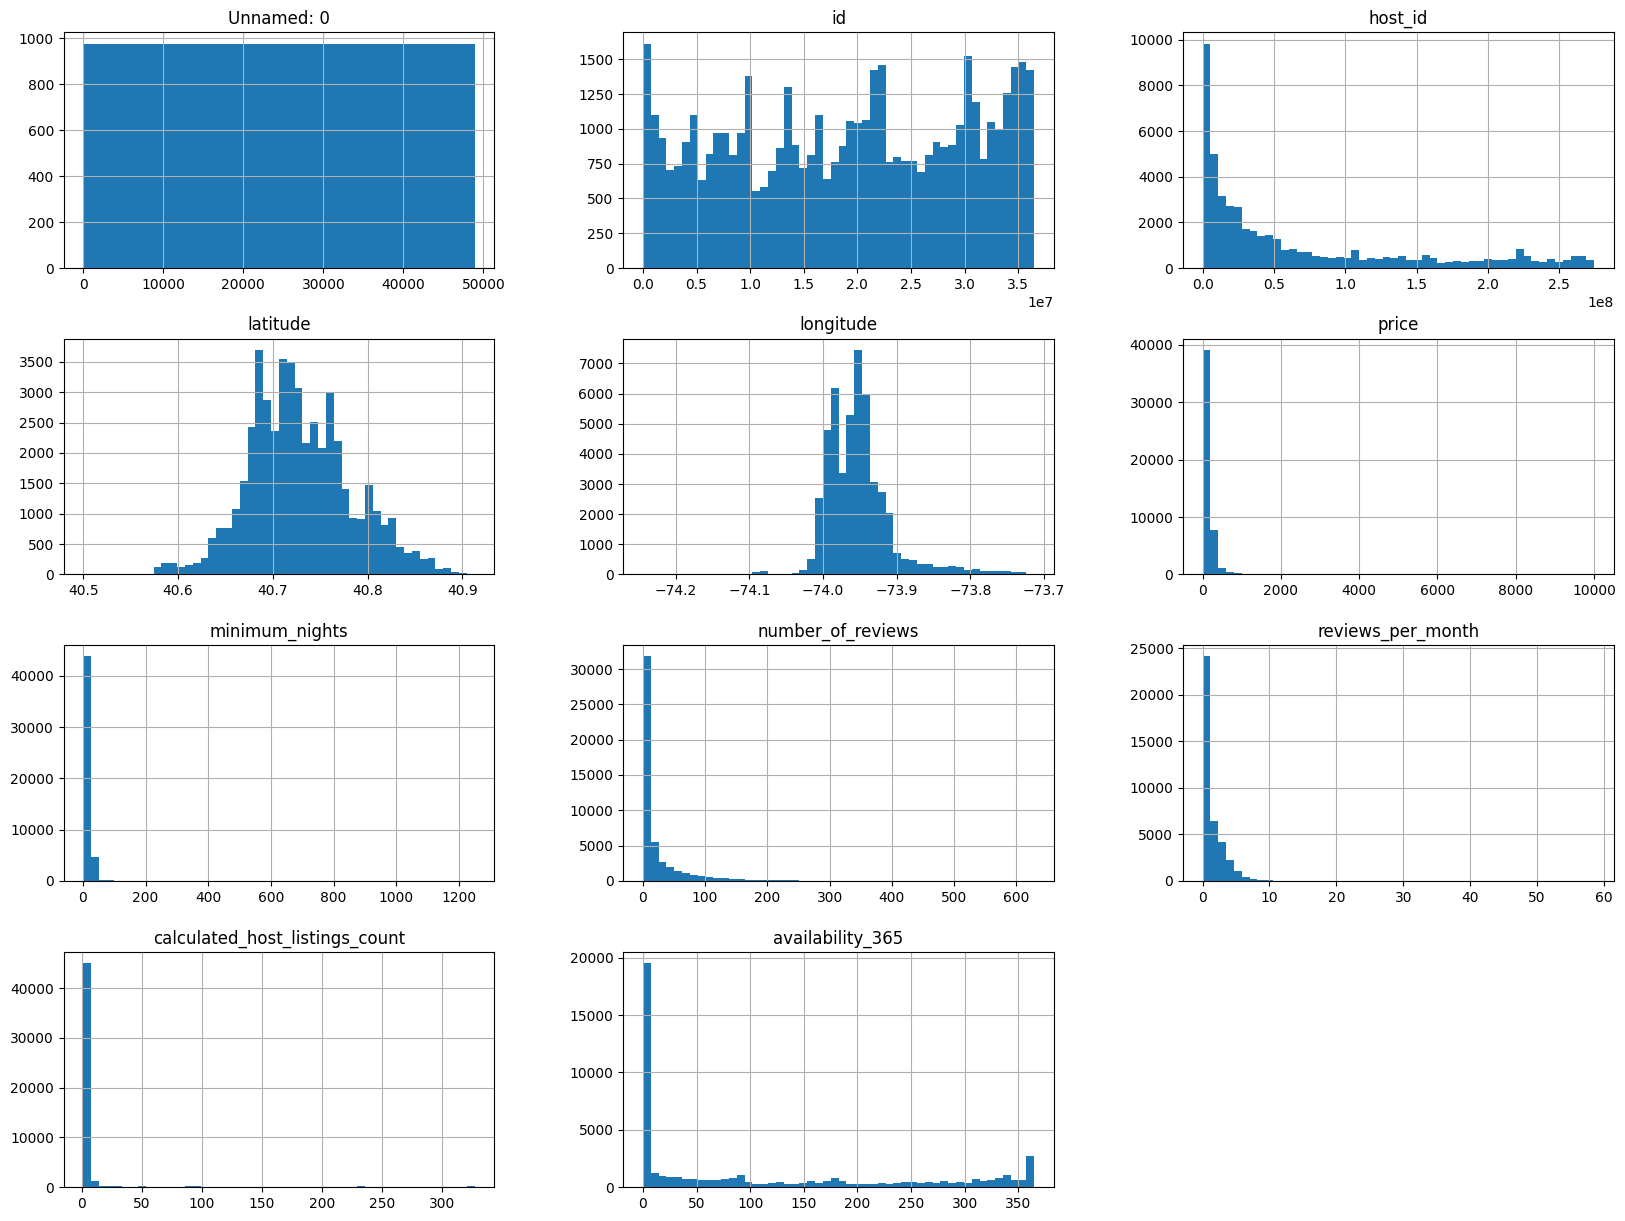

In [4]:
total_data.hist(bins=50, figsize=(20,15))
plt.show()

In [22]:
total_data = total_data.drop(["Unnamed: 0","id", "name", "host_id", "host_name", "neighbourhood", 
                                    "number_of_reviews", "last_review", "reviews_per_month",
                                    "calculated_host_listings_count"], axis= 1)

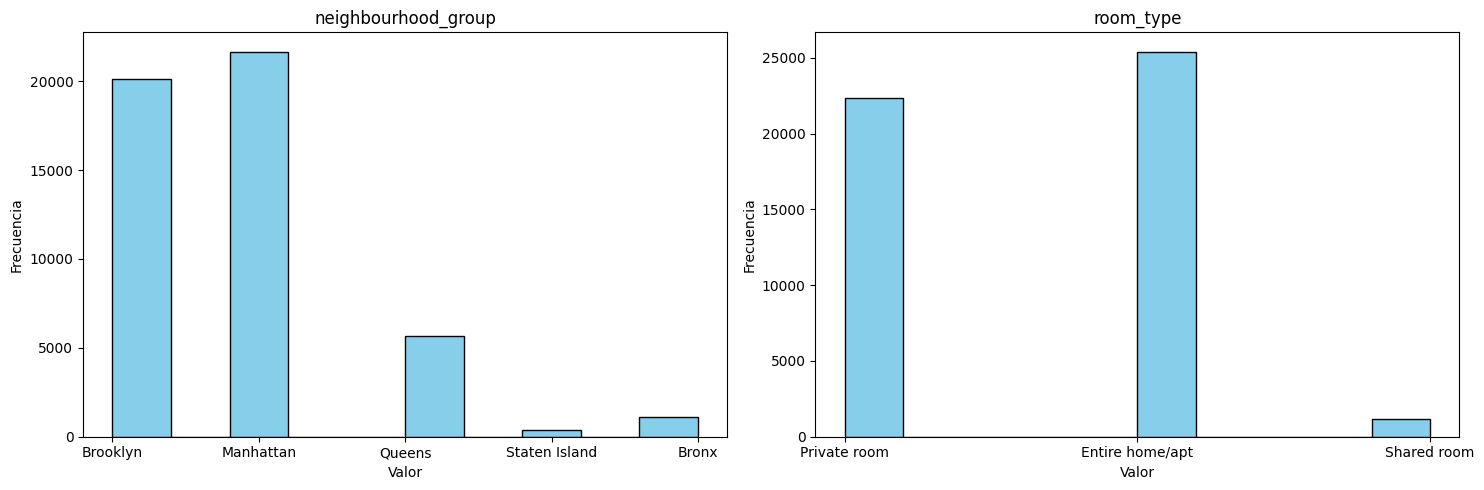

In [23]:
# Obtener la lista de todas las columnas en el DataFrame
columnas_str = total_data.select_dtypes(include=['object']).columns
# Configurar el tamaño de la figura y la cantidad de subgráficos por fila y columna
num_filas = len(columnas_str) // 2 + len(columnas_str) % 2
num_columnas = 2

# Crear la figura y los ejes
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(15, 5 * num_filas))
# Iterar sobre las columnas y crear un histograma para cada una
for i, columna in enumerate(columnas_str):
    axs[i].hist(total_data[columna], color='skyblue', edgecolor='black')
    axs[i].set_title(columna)
    axs[i].set_xlabel('Valor')
    axs[i].set_ylabel('Frecuencia')

# Ajustar el diseño y mostrar los histogramas
plt.tight_layout()
plt.show()

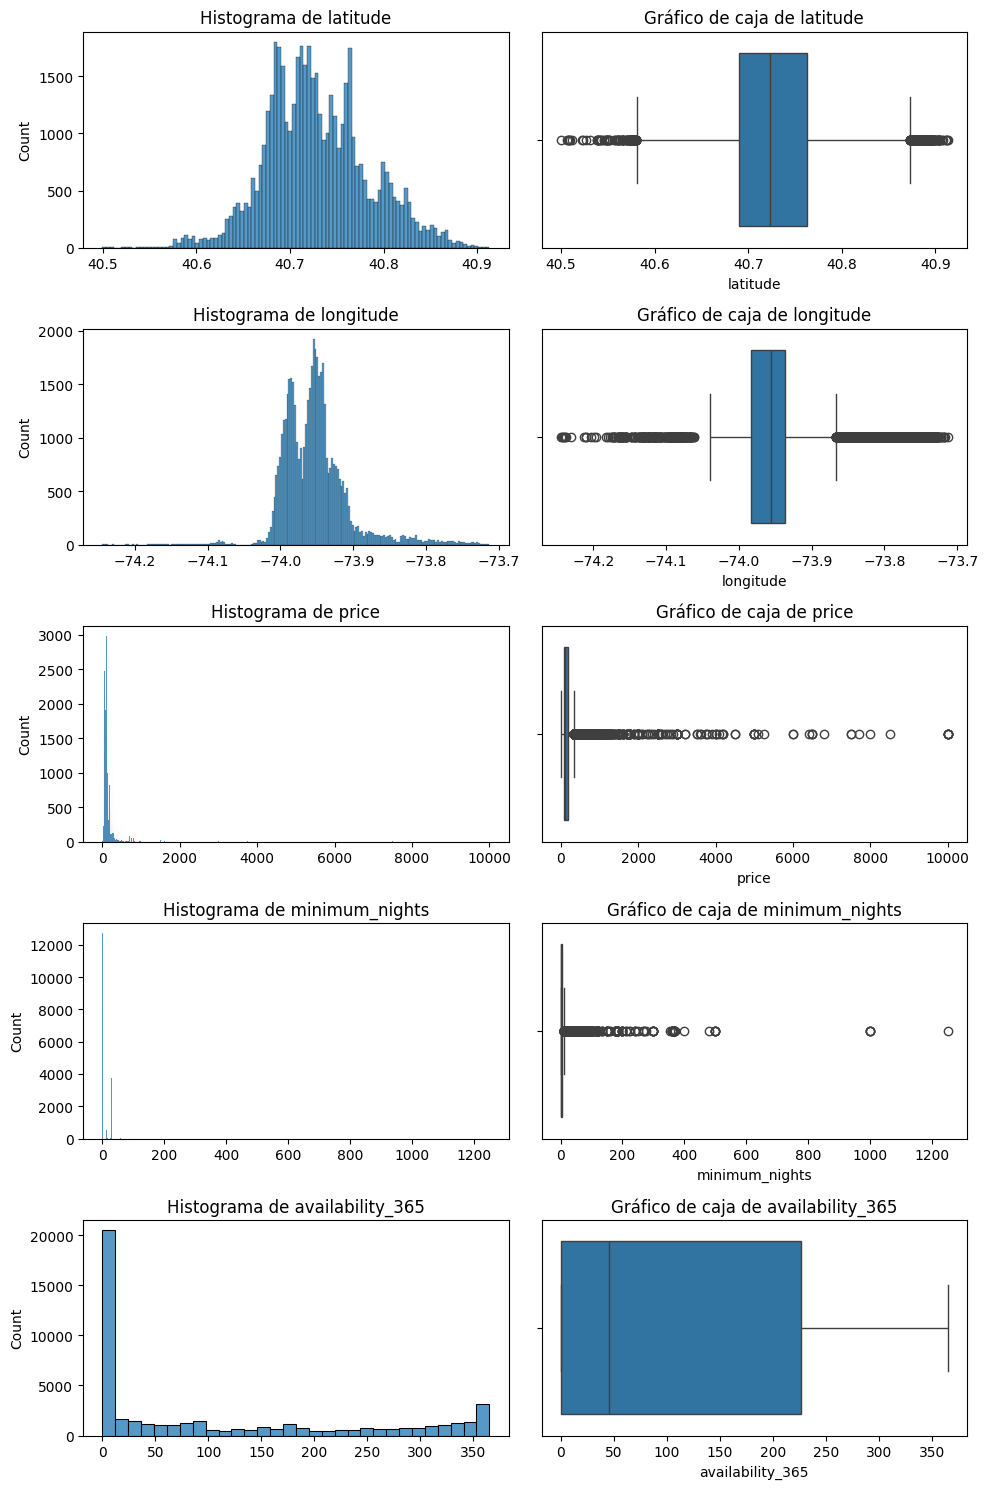

In [28]:
# Obtener la lista de todas las columnas numéricas en el DataFrame
columnas_numericas = total_data.select_dtypes(include=['float64', 'int64']).columns
# Configurar el tamaño de la figura y la cantidad de subgráficos por fila y columna
num_filas = len(columnas_numericas)
num_columnas = 2
# Crear la figura y los ejes
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(10, 3 * num_filas))

# Iterar sobre las columnas y crear un par de gráficos para cada una
for i, columna in enumerate(columnas_numericas):
    # Histograma
    sns.histplot(data=total_data, x=columna, ax=axs[i, 0]).set(xlabel=None)
    axs[i, 0].set_title(f"Histograma de {columna}")
    
    # Gráfico de caja
    sns.boxplot(data=total_data, x=columna, ax=axs[i, 1])
    axs[i, 1].set_title(f"Boxplo{columna}")

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()

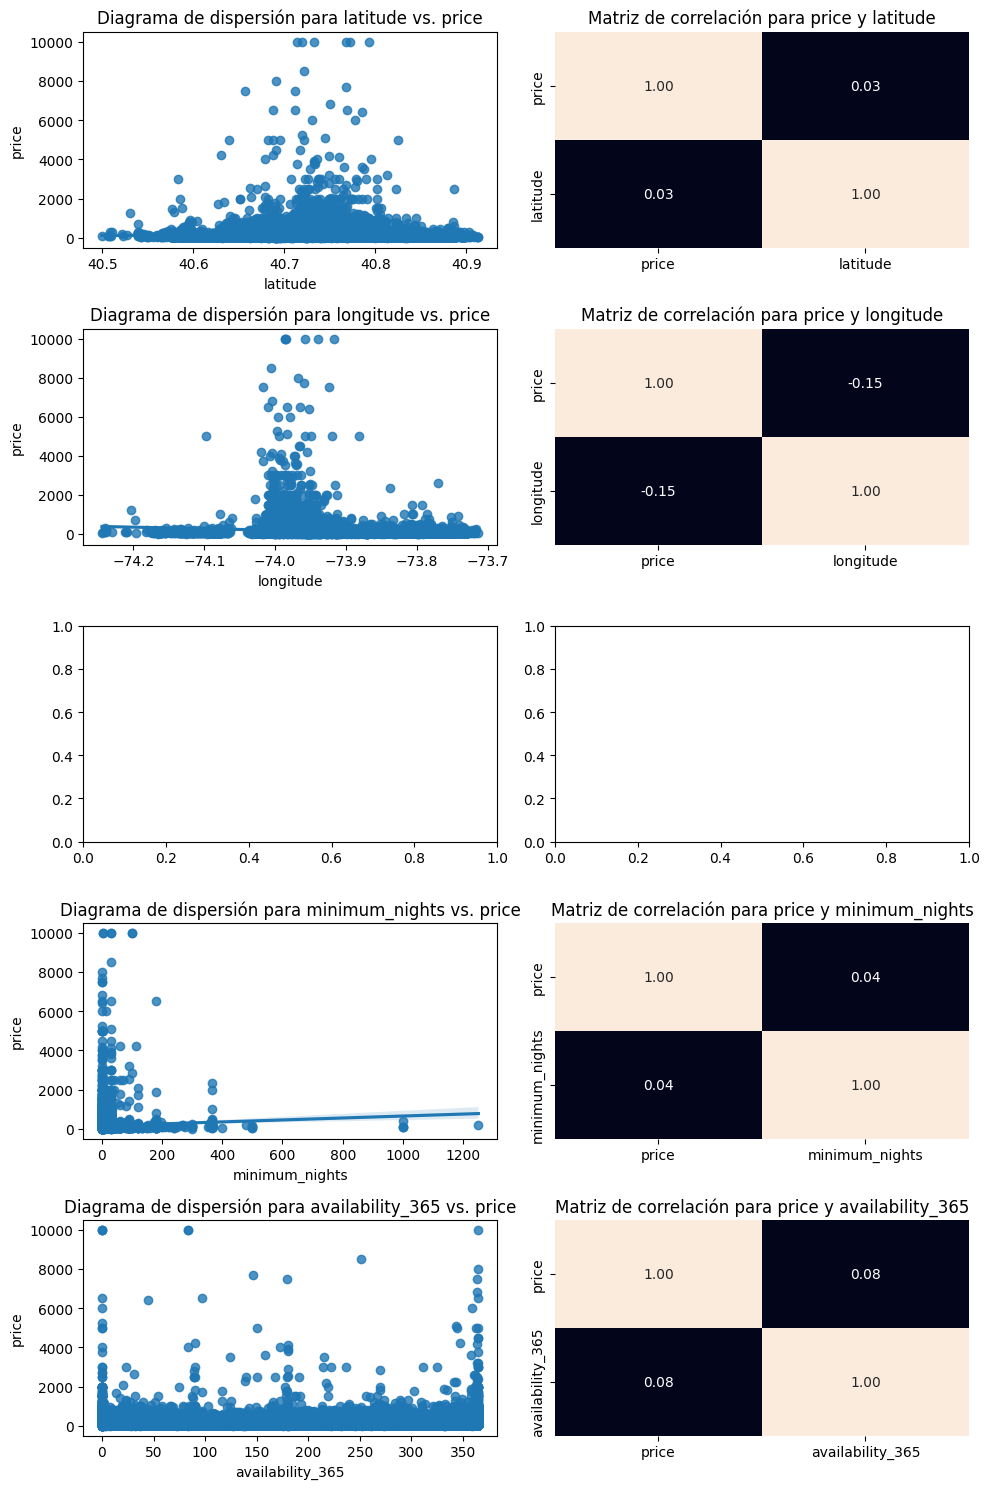

In [32]:
# Seleccionar variable target:
target = 'price'

# Crear la figura y los ejes
fig, axis = plt.subplots(num_filas, num_columnas, figsize=(10, 3 * num_filas))
# Aplanar la matriz de ejes si es necesario
axis = axis.flatten()
# Iterar sobre las columnas y crear un par de gráficos para cada una
for i, columna in enumerate(columnas_numericas):
    if columna == target:
        continue
    # Diagrama de dispersión
    sns.regplot(ax=axis[i * num_columnas], data=total_data, x=columna, y=target)
    axis[i * num_columnas].set_title(f"Diagrama de dispersión para {columna} vs. {target}")
    
    # Matriz de correlación (heatmap)
    sns.heatmap(total_data[[target, columna]].corr(), annot=True, fmt=".2f", ax=axis[i * num_columnas + 1], cbar=False)
    axis[i * num_columnas + 1].set_title(f"Matriz de correlación para {target} y {columna}")

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()